In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To allow more flexible output. (see comments on Q4)
from IPython.display import display, Markdown, HTML

%matplotlib inline


# format for floats
pd.options.display.float_format = '{:,.2f}'.format

In [45]:
df_gdp = pd.read_csv('data/gdp_per_capita.csv').set_index('Country Name')
df_gender = pd.read_csv('data/gender_equality.csv').set_index('Country Name')
df_happ = pd.read_csv('data/2020.csv').set_index('Country name')

In [46]:
# Gender Equality separated by GENDER INEQUALITY INDEX and GENDER DEVELOPMENT INDEX
df_gender_GII = df_gender[df_gender['Indicator Code'] == 'GE_GII']
df_gender_GDI = df_gender[df_gender['Indicator Code'] == 'GE_GDI']

In [47]:
#df_gdp.dtypes
df_gdp = df_gdp.drop(columns=['Unnamed: 65'])

## Gender Inequality Index Comparison by Country

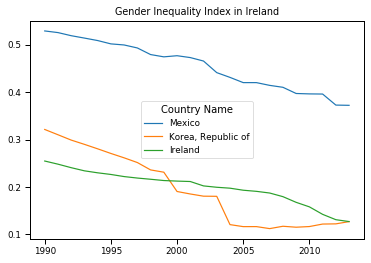

In [48]:
df_gender_GII_clean = df_gender_GII.T.drop(index=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

df_gender_GII_by_country = df_gender_GII[(df_gender_GII.index == 'Ireland') | (df_gender_GII.index == 'Mexico') | (df_gender_GII.index == 'Korea, Republic of')].T.drop(index=['Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

df_gender_GII_by_country.plot(title = 'Gender Inequality Index in Ireland')


## GDP per Capita and Gender Inequality Index in the United States

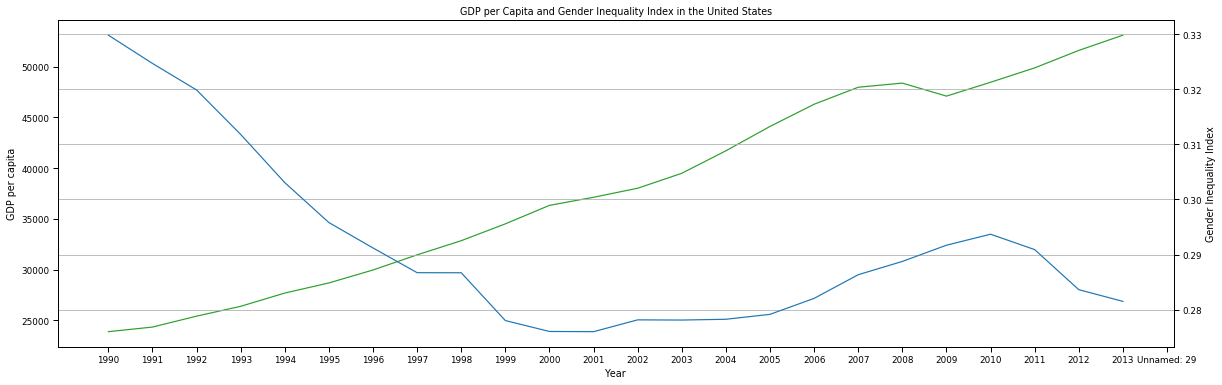

In [49]:
df_gdp_US = df_gdp[df_gdp.index == 'United States'].T.drop(index = ('Code'))
df_gdp_US = df_gdp_US.iloc[30:-7]

fig, ax1 = plt.subplots(figsize=(20, 6))

years = df_gender_GII_clean.index

ax1.set_xlabel('Year')
ax1.set_ylabel("GDP per capita", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.plot(df_gdp_US.index, df_gdp_US['United States'], color='tab:green', label = 'GDP per capita')

ax2 = ax1.twinx()
ax2.plot(df_gender_GII_clean['United States'].index, df_gender_GII_clean['United States'], label = 'GII')
ax2.set_ylabel("Gender Inequality Index", color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.grid(True)
plt.title('GDP per Capita and Gender Inequality Index in the United States')
plt.show()

## Happiness x GDP

## GDP per capita

In [50]:
df_gdp.head(10)

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,"24,985.01","24,712.49","26,441.62","26,893.01","28,396.91","28,452.17","29,350.81","30,253.28",nan,nan
Africa Eastern and Southern,AFE,147.61,147.01,156.19,182.24,162.35,180.21,190.85,192.34,204.01,...,"1,770.74","1,736.17","1,713.90","1,703.60","1,549.04","1,431.78","1,573.06","1,574.98","1,530.06","1,359.62"
Afghanistan,AFG,59.77,59.86,58.46,78.71,82.10,101.11,137.59,160.90,129.11,...,591.19,638.85,624.32,614.22,556.01,512.01,516.68,485.67,494.18,516.75
Africa Western and Central,AFW,107.93,113.08,118.83,123.44,131.85,138.53,144.33,128.58,129.64,...,"1,862.31","1,965.12","2,157.48","2,212.85","1,894.31","1,673.84","1,613.47","1,704.14","1,777.92","1,710.07"
Angola,AGO,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,"4,615.47","5,100.10","5,254.88","5,408.41","4,166.98","3,506.07","4,095.81","3,289.64","2,809.63","1,776.17"
Albania,ALB,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,"4,437.14","4,247.63","4,413.06","4,578.63","3,952.80","4,124.06","4,531.02","5,287.66","5,395.66","5,246.29"
Andorra,AND,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,"43,334.81","38,686.46","39,540.72","41,303.93","35,770.78","37,475.64","38,964.90","41,791.97","40,897.33",nan
Arab World,ARB,nan,nan,nan,nan,nan,nan,nan,nan,304.74,...,"6,888.98","7,378.23","7,373.20","7,300.03","6,220.72","5,969.62","5,987.34","6,504.15","6,489.04","5,612.69"
United Arab Emirates,ARE,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,"39,194.67","40,976.49","42,412.64","43,751.81","38,663.40","38,141.87","40,644.79","43,839.32","42,701.44","36,284.56"


## Preprocessing 

In [51]:
#preprocessing

df_happ_renamed = df_happ.rename(columns={'Country name': 'Country Name'})
display(df_happ_renamed.head())

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.81,0.03,7.87,7.75,10.64,0.95,71.90,0.95,-0.06,0.20,1.97,1.29,1.50,0.96,0.66,0.16,0.48,2.76
Denmark,Western Europe,7.65,0.03,7.71,7.58,10.77,0.96,72.40,0.95,0.07,0.17,1.97,1.33,1.50,0.98,0.67,0.24,0.50,2.43
Switzerland,Western Europe,7.56,0.04,7.63,7.49,10.98,0.94,74.10,0.92,0.11,0.30,1.97,1.39,1.47,1.04,0.63,0.27,0.41,2.35
Iceland,Western Europe,7.50,0.06,7.62,7.39,10.77,0.97,73.00,0.95,0.25,0.71,1.97,1.33,1.55,1.00,0.66,0.36,0.14,2.46
Norway,Western Europe,7.49,0.03,7.56,7.42,11.09,0.95,73.20,0.96,0.13,0.26,1.97,1.42,1.50,1.01,0.67,0.29,0.43,2.17


In [52]:
df = pd.merge(df_happ_renamed, df_gdp, left_index=True, right_index=True, how='inner')
display(df)

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Finland,Western Europe,7.81,0.03,7.87,7.75,10.64,0.95,71.90,0.95,-0.06,...,"51,082.00","47,710.79","49,878.04","50,260.30","42,784.70","43,784.28","46,297.50","49,964.50","48,628.64","48,744.99"
Denmark,Western Europe,7.65,0.03,7.71,7.58,10.77,0.96,72.40,0.95,0.07,...,"61,753.65","58,507.51","61,191.19","62,548.98","53,254.86","54,664.00","57,610.10","61,591.93","59,775.74","61,063.32"
Switzerland,Western Europe,7.56,0.04,7.63,7.49,10.98,0.94,74.10,0.92,0.11,...,"91,254.03","86,547.67","88,109.49","89,684.71","84,776.14","83,073.28","83,352.09","86,388.40","85,334.52","87,097.04"
Iceland,Western Europe,7.50,0.06,7.62,7.39,10.77,0.97,73.00,0.95,0.25,...,"47,714.59","45,995.55","49,804.98","54,576.74","52,951.68","61,987.93","72,010.15","74,469.80","68,941.46","59,270.18"
Norway,Western Europe,7.49,0.03,7.56,7.42,11.09,0.95,73.20,0.96,0.13,...,"100,600.56","101,524.14","102,913.45","97,019.18","74,355.52","70,460.56","75,496.75","82,267.81","75,719.75","67,329.68"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central African Republic,Sub-Saharan Africa,3.48,0.12,3.70,3.25,6.63,0.32,45.20,0.64,0.08,...,551.75,565.80,380.30,424.45,377.42,402.19,450.90,475.95,467.91,492.80
Rwanda,Sub-Saharan Africa,3.31,0.05,3.42,3.21,7.60,0.54,61.10,0.90,0.06,...,668.49,725.17,722.89,743.56,751.08,744.76,772.32,783.64,820.15,797.86
Zimbabwe,Sub-Saharan Africa,3.30,0.06,3.41,3.18,7.87,0.76,55.62,0.71,-0.07,...,"1,093.65","1,304.97","1,430.00","1,434.90","1,445.07","1,464.59","1,235.19","1,254.64","1,316.74","1,214.51"
South Sudan,Sub-Saharan Africa,2.82,0.11,3.03,2.61,7.43,0.55,51.00,0.45,0.02,...,"1,516.40","1,179.74","1,779.47","1,322.82","1,119.65",nan,nan,nan,nan,nan


## Correlation between Global Happiness and GDP per capita

Text(0.5, 1.0, 'Correlation between Happiness and Economy in 2020')

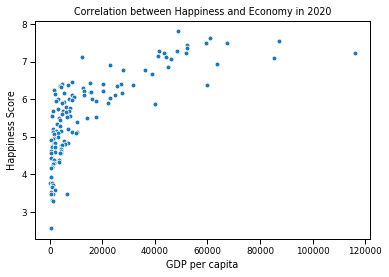

In [53]:
p = sns.scatterplot(data = df, x = '2020', y = 'Ladder score')
p.set_xlabel('GDP per capita')
p.set_ylabel('Happiness Score')
p.set_title('Correlation between Happiness and Economy in 2020')

In [54]:
corr = df['Ladder score'].corr(df['2020'])
print(corr)

0.7234742106826753


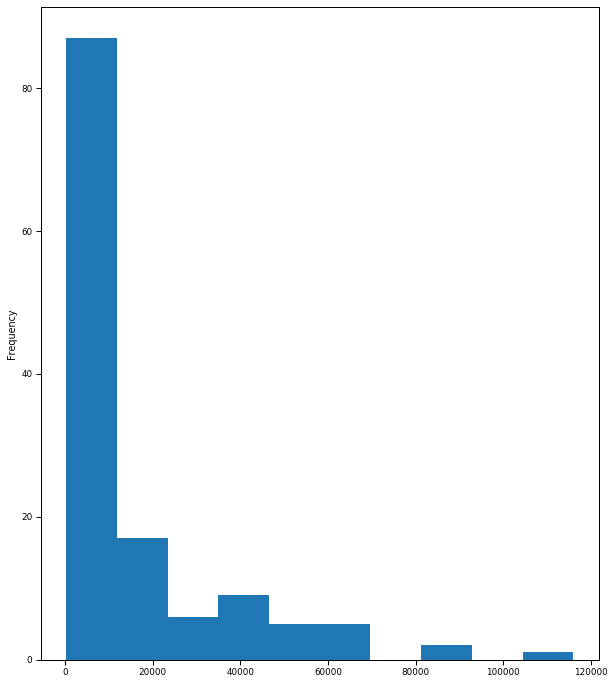

In [55]:
df['2020'].plot(kind='hist', figsize=(10, 12))

## Normalisation of Data

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
# log scale transformation of GDP-ppp-per-capita
df[['2020', '2019']] = pt.fit_transform(df[['2020', '2019']])

## Correlation between Global Happiness and GDP per capita Redone

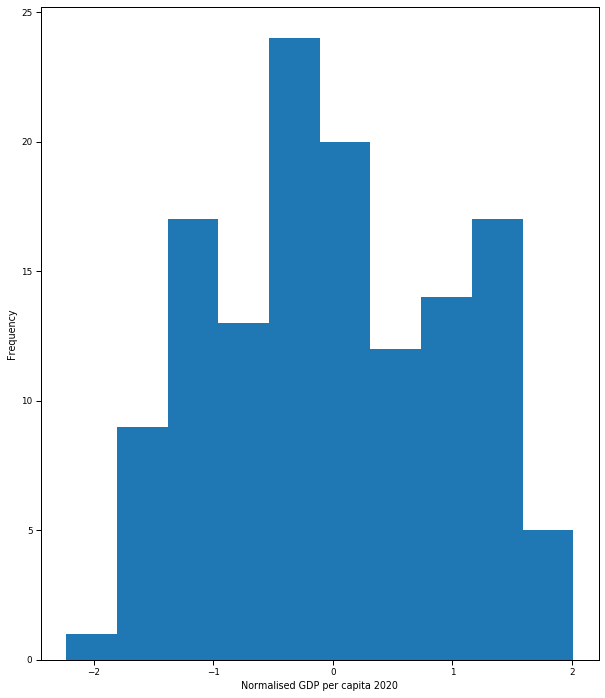

In [57]:
plot = df['2020'].plot(kind='hist', figsize=(10,12))
plot.set_xlabel("Normalised GDP per capita 2020")
plot

In [58]:
corr = df['Ladder score'].corr(df['2020'])
print(corr)

0.8425141949704316


Text(0.5, 1.0, 'Correlation between Happiness and Economy in 2020')

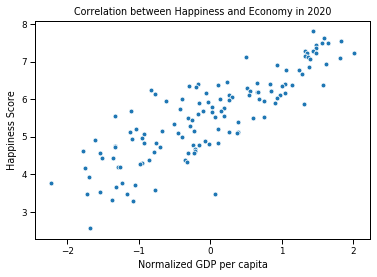

In [59]:
p = sns.scatterplot(data = df, x = '2020', y = "Ladder score")
p.set_xlabel('Normalized GDP per capita')
p.set_ylabel('Happiness Score')
p.set_title('Correlation between Happiness and Economy in 2020')